# Theoretical Introduction 

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. Perceptron is also the very first step to construct Neural Network since it's the simplest version of a network.

The fundamental block of neural network is artificial neuron i.e. it takes a weighted aggregate of inputs, applies a function and gives an output. The very first step towards the artificial neuron was taken by Warren McCulloch and Walter Pitts in 1943 inspired by neurobiology, created a model known as McCulloch-Pitts Neuron. MP Neuron Model is also known as linear threshold gate model.
In the MP Neuron Model, all the inputs have the same weight while calculating the outcome and the bias parameter can only take fewer values i.e., the parameter space for finding the best parameter is limited.

In 1958 Frank Rosenblatt proposed the **perceptron**, a more generalized computational model than the McCulloch-Pitts Neuron. The important feature in the Rosenblatt proposed perceptron was the introduction of weights for the inputs.


The basic artificial perceptron/neuron can be represented by

<img width=400 src='neuron2.png'> 

The input vector $\vec{x}$ is multiplied by a **weight vector** $\vec{w}$ thanks to a scalar product $ z=\vec{x}\cdot\vec{w}=\sum_{i}x_iw_i$ and pass to an **activation function** $f(z)=y$. This function 'decides' to fire the neuron or not and to give the output $y$. The 0th-input $x_0=1$ is multiplied by $w_0$ that will be called **bias** or **treshold**. 


The ensemble of the input values is called **input layer** while the outputs is called **output layer**. Normally there could be more layer between the input and the output ones and they will take the name of **hidden layers**.



It's clear that in constructing a perceptron (or also more sofisticated network) is important to choose the activation function and weight vector. The weight vector, in turns, they will be the parameters that the model has to learn by means of a train. On the other side, the train procedure, normally performed on the training set where there will be available as usual, the inputs and the outputs, has to be guided by what we call **loss function**, that is a function whose value gives us the idea of ignorance and wrongness of the parameters values. So, the important things to keep in mind while constructing a network are, principally:

- Hidden layers
- Activation function
- Loss function



### Hidden layers

In the single layer perceptron, that is the one we are going to study, there won't be hidden layers and the output layer will be just a node giving 0 or 1. In case of perceptron with hidden layers we will talk about *multi-layer perceptron* while in case of a perceptron with a multidimension output, used for multiclassification problems, we will use the term *multi-class perceptron* (MLP):

<img width=400 src='neuron3.png'/> 

We will study these cases in others notebook, here we concentrate on the simplest one: single layer perceptron for binary classification.

 
### Activation function

The activation function of a node defines the output $y$ of that node given an input or set of inputs $x$ (or $z$). Is a kind of function that, despite is range domain, its codomain split into a finite set, and in particular, into two values. This helps the classification problems. In biologically inspired neural networks, the activation function is usually an abstraction representing the rate of action potential firing in the cell. It is linked to the kind of problem we are dealing with and in general there exists a broad classification of the standard activation function commonly used in machine learning. Here we limit ourselves to divide the classes into *linear* and *non-linear* and to show some example of these function:

  - Linear:    $y=f(z)=z$
  - Binary Step: $y=f(z)=\begin{cases} 0, &  z<0 \\ 1, & z\geq 0\end{cases}$
  - ReLU:        $y=f(z)=\begin{cases} 0, &  z\leq 0 \\ z, & z>0\end{cases}$
  - Sigmoid:     $y=f(z)=\frac{1}{1+e^{-z}}$
  - Tanh:        $y=f(z)=\tanh(z)$

There are more than the above listed functions and each of them has its own domain, range, differentiability properties etc.. 
For the problem we are studying, namely the single layer perceptron we will choose the Binary Step function. 


### Loss function

The choice of the loss function is the the third fundamental components in constracting a network of artificial neurons. It is basically supposed to give a quantitative idea of how much our prediction $\hat{y}$ is far from the actual values $y$, for all the set. Therefore, it has to have to form of:

$$
\mathbb{L}(\hat{y}, y) = \sum_k \mathcal{L}_k(\hat{y}_k, y_k)
$$
where the sum over $k$ runs over the dataset (The index $k$ runs over the rows of the dataset, the index $i$ runs over the columns or features chosen).

Since it depends on the prediction $\hat{y}_k$ the loss function implicitly depends on the weight vector $\vec{w}$ since $\hat{y}_k = f(z_k)= f(\vec{x}\cdot\vec{w})$. Hence, the training problem turns out to be a problem of find the optimal weight vector values in order to minimize the loss function. The methods to minimize the loss function are another important issue in neural network and deserve a dedicated study. Here we will use the method of **gradient descent** that we will explain in the dedicated section. 

Coming back to loss function, the optimal choice strongly depends on the kind of problem and in particular on the activation function we used. Indeed weather we are solving a regression problem or a classification problem we probably have chosen an activation function predicitng a numerical value or a binary (categorical) value, repsectively. The nature of the output of the activation function strongly influece the chouce of the loss function. We list here some examples of loss function related the problem and activation function has been used:

 - Regression: Predicting a numerical value from multiple features:

     Activation Function: Linear or ReLU
     
     Loss Function: MSE     $\quad\mathbb{L}(\hat{y}, y)=\frac{1}{N}\sum_k^N(\hat{y}_k-y_k)^2$ 
         
         
 - Classification: Predicting a binary outcome:

     Activation Function: Sigmoid
     
     Loss Function: Binary cross entropy     $\quad\mathbb{L}(\hat{y}, y)=-\sum_{k}^N\left[y\log(\hat{y})+(1-y)\log(1-\hat{y})\right]$         



## Single layer perceptron setup

Having given a brief introduction of neural network we set now what we are going to study and what we will use. We are going to focus on the single layer perceptron for binary classification and we wiil use the following defining setup:

- Output: Binary
- Hidden layers: 0
- Activation function: Binary Step, $\hat{y}=f(z)=\begin{cases} 0, &  z<0 \\ 1, & z\geq 0\end{cases}$
- Loss function: Hinge function, $\mathcal{L}_k(\hat{y}_k, y_k)= \max\left(0, 1-\hat{y}_k\right)=\max\left(0, 1-(\vec{x}\cdot\vec{w})_k\right) $


## Dataset

For the purpose of implementing the single layer perceptron we will use the dataset of the heart disease already used for Logistic Regression and DecisionTree Classifer. We briefly review here the dataset.

The dataset contains the following features

- age | Age | int 
- sex | Sex | bin (1 = male; 0 = female)
- cp | Chest Pain Type | int (from 0 to 4) 
- trestbps | Resting Blood Pressure int
- chol |  Serum Cholestoral | int (mg/dl)
- fbs |  Fasting Blood Sugar > 120 mg/dl | bin (1 = true; 0 = false)
- resting electrocardiographic results | ECG result at rest | (from 0 to 2)
- thalach | Maximum Heart Hate Achieved | int 
- exang | Exercise Induced Angina | bin  (1 = yes; 0 = no)
- oldpeak |  ST Depression Induced by exercise relative to rest | float
- slope | Slope of the peak exercise ST segment | int 
- ca | number of major vessels (0-3) colored by flourosopy | int
- thal | 3 = normal; 6 = fixed defect; 7 = reversable defect

The target variable is

- target | bin (1 = presence of disease; 0 = health heart)

<hr style="border: dashed rgb(0,1,0) 0.9px"/>

# Inizialization

In [99]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn.tree import DecisionTreeClassifier #for DecisionTree
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import accuracy_score

In [100]:
df=pd.read_csv('heart.csv')
df.shape

(303, 14)

In [101]:
df.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1


<hr style="border: dashed rgb(0,1,0) 0.9px"/>

# Exploration of Data

In [102]:
num_feat=['age','trestbps','chol','thalach','oldpeak']
cat_feat=['sex','cp','fbs','restecg','exang','slope']

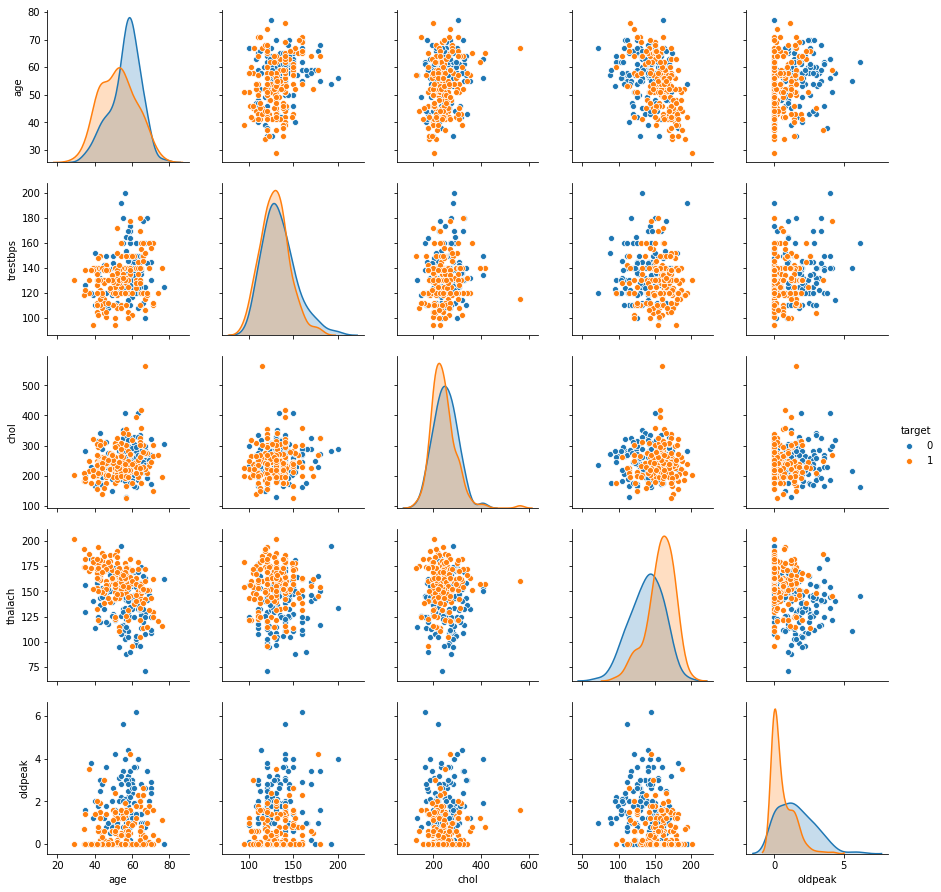

In [103]:
fig = sns.pairplot(df, vars=num_feat, hue='target')

<hr style="border: dashed rgb(0,1,0) 0.9px"/>

# Modelling 

## Model Construction

In [106]:
class Perceptron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    
    def act_func(self, x):
        z=np.dot(x,self.w)
        if z<0:
            y=0
        else:
            y=1
        return y
    
    
    def predict(self, X):
        Y=[]
        for j in range(X.shape[0]):
            x=X.iloc[j]
            res = self.act_func(x)
            Y.append(res)
        return np.array(Y)
        
    
    def fit(self, X, Y, epochs = 1, lr = 1):
        
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy = {}
        max_accuracy = 0
        wt_matrix = []
        for i in range(epochs):
            for j in range(X.shape[0]):
                x=X.iloc[j]
                y=Y.iloc[j]
                y_pred = self.act_func(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
            
            wt_matrix.append(self.w)
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
                #checkpoint (Save the weights and b value)
        self.w = chkptw
        self.b = chkptb
        
        print(max_accuracy)
    #plot the accuracy values over epochs
        plt.plot(accuracy.values())
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()
    
    #return the weight matrix, that contains weights over all epochs
        return np.array(wt_matrix)           

## Train-Test Split

In [107]:
train, test = train_test_split(df, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(212, 14)
(91, 14)


In [108]:
train_X = train.drop('target',axis=1)# taking the training data features
train_Y=train.target# output of our training data
test_X= test.drop('target',axis=1) # taking test data features
test_Y =test.target   #output value of test data

## Model Fitting

0.8679245283018868


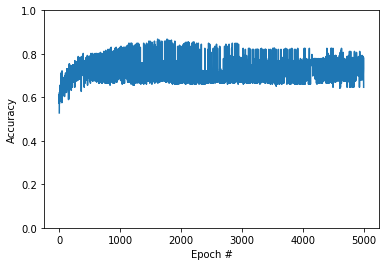

In [109]:
perceptron = Perceptron()

#epochs = 5000 and lr = 0.3
wt_matrix = perceptron.fit(train_X, train_Y, 5000, 0.3)

## Prediction

0.8241758241758241


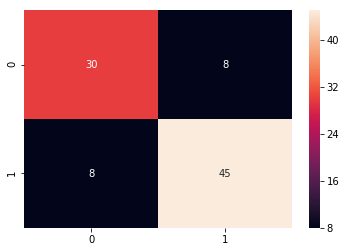

In [112]:
#making predictions on test data
Y_pred_test = perceptron.predict(test_X)


sns.heatmap(confusion_matrix(test_Y, Y_pred_test), annot=True)
print(accuracy_score(Y_pred_test, test_Y))

<hr style="border: dashed rgb(0,1,0) 0.9px"/>